# New **QAOA** 

---
After all development and research, a new path to follow is to study the QAOA algorithm in more depth to try to solve the NMcut problem. The main idea is to try variations of the QAOA to see if this method is feasible and use this to solve the NMcut in a real QPU.

In [1]:
from qiskit.quantum_info import SparsePauliOp,Statevector
from typing import Union
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import SamplerV2
from qiskit.visualization import plot_histogram
from scipy.optimize import minimize
import re
import sys

sys.path.append('../')

from qaoa_functions import *

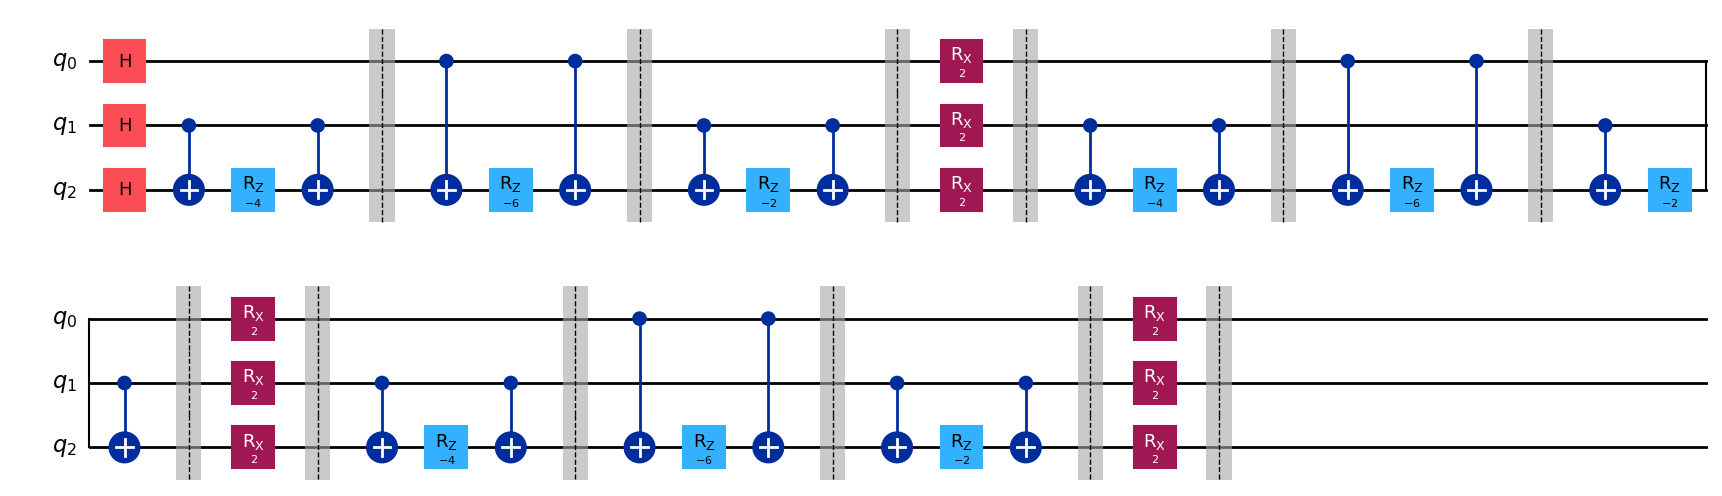

In [ ]:
qc = create_ansatz("2Z1Z2+3Z0Z2+Z1Z2",3,layers=3,phi=[1]*3,beta=[1]*3)

qc.draw('mpl')

El minimo de energia es: -1.2890625
Los parametros son: [2.64506136 0.39050554 1.6150157  2.8482363 ]


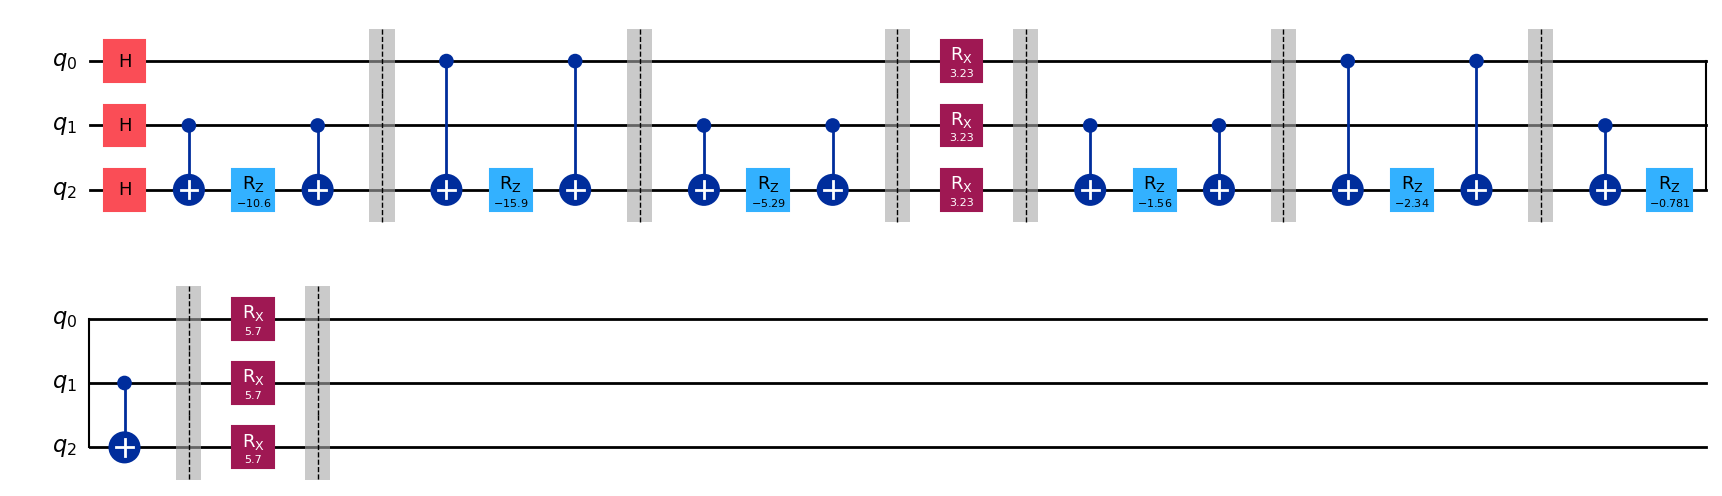

In [3]:
exp = "2Z1Z2+3Z0Z2+Z1Z2"
qaoa = QAOA(exp,3,2)
qaoa.get_opt_circ()

print("El minimo de energia es:",qaoa.min)
print("Los parametros son:",qaoa.param)
qaoa.qc.draw('mpl')

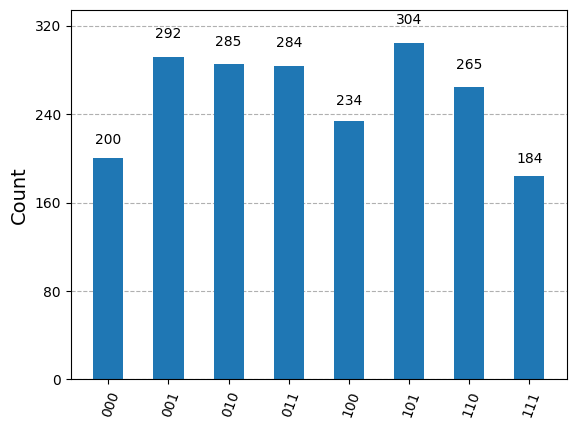

In [4]:
sim = AerSimulator()

# Transpile the circuit for the simulator or real QPU
qc.measure_all()
qc = transpile(qc,sim)

# Run the circuit and collect results
sampler = SamplerV2()
job = sampler.run([qc],shots=2048)
job_result = job.result()
counts=job_result[0].data.meas.get_counts()
plot_histogram(counts)

In [3]:
import dimod
matrix = np.array( [[ 0, 92, 73, 78, 92],
                    [92,  0, 21, 49, 34],
                    [73, 21,  0, 35, 63],
                    [78, 49, 35,  0, 29],
                    [92, 34, 63, 29,  0]])
exp = prepare_exp(matrix,c=1)
exp_qubo = min_cut_c(matrix,c=1,alpha=matrix.shape[0]*1000)
print(exp)
print(exp_qubo)

+2454.0Z0Z1+2489.5Z2Z1+2463.5Z2Z0+2475.5Z3Z1+2461.0Z3Z0+2482.5Z3Z2+2483.0Z4Z1+2454.0Z4Z0+2468.5Z4Z2+2485.5Z4Z3+7500.0Z1+7500.0Z0+7500.0Z2+7500.0Z3+7500.0Z4
BinaryQuadraticModel({1: -4804.0, 0: -4665.0, 2: -4808.0, 3: -4809.0, 4: -4782.0}, {(0, 1): 9816.0, (2, 1): 9958.0, (2, 0): 9854.0, (3, 1): 9902.0, (3, 0): 9844.0, (3, 2): 9930.0, (4, 1): 9932.0, (4, 0): 9816.0, (4, 2): 9874.0, (4, 3): 9942.0}, 5000.0, 'BINARY')


In [15]:
solver = dimod.ExactCQMSolver()
problem = dimod.ConstrainedQuadraticModel()
problem.set_objective(exp_qubo)
sol = solver.sample_cqm(problem)

# We want the best feasible solution. We can filter by its feasibility and take the first element
feas_sol = sol.filter(lambda s: s.is_feasible)
print(feas_sol)

   0 1 2 3 4  energy num_oc. is_sat. is_fea.
8  0 0 0 1 0   191.0       1 arra... np.T...
4  0 0 1 0 0   192.0       1 arra... np.T...
2  0 1 0 0 0   196.0       1 arra... np.T...
16 0 0 0 0 1   218.0       1 arra... np.T...
1  1 0 0 0 0   335.0       1 arra... np.T...
0  0 0 0 0 0  5000.0       1 arra... np.T...
20 0 0 1 0 1  5284.0       1 arra... np.T...
10 0 1 0 1 0  5289.0       1 arra... np.T...
12 0 0 1 1 0  5313.0       1 arra... np.T...
6  0 1 1 0 0  5346.0       1 arra... np.T...
18 0 1 0 0 1  5346.0       1 arra... np.T...
3  1 1 0 0 0  5347.0       1 arra... np.T...
24 0 0 0 1 1  5351.0       1 arra... np.T...
17 1 0 0 0 1  5369.0       1 arra... np.T...
9  1 0 0 1 0  5370.0       1 arra... np.T...
5  1 0 1 0 0  5381.0       1 arra... np.T...
11 1 1 0 1 0 20284.0       1 arra... np.T...
21 1 0 1 0 1 20289.0       1 arra... np.T...
19 1 1 0 0 1 20313.0       1 arra... np.T...
13 1 0 1 1 0 20346.0       1 arra... np.T...
25 1 0 0 1 1 20346.0       1 arra... np.T...
28 0 0 1 1

In [36]:
qaoa = QAOA(exp,5,2,method='Powell')
qaoa.get_opt_circ()

print("El minimo de energia es:",qaoa.min)
print("Los parametros son:",qaoa.param)
# qaoa.qc.draw('mpl')

El minimo de energia es: -2205.2646484375
Los parametros son: [5.78000894 1.47628589 0.87071312 2.86043006]


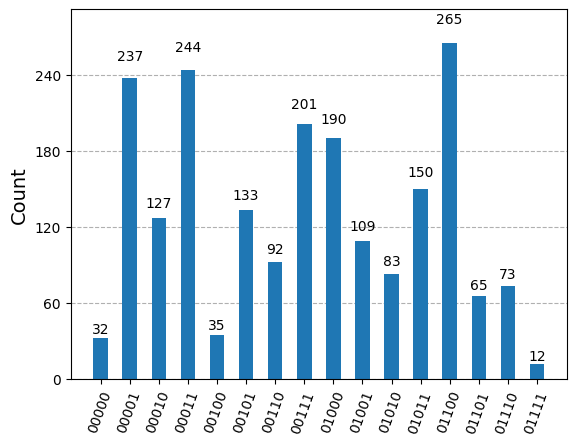

In [37]:
sim = AerSimulator()
qc = qaoa.qc
# Transpile the circuit for the simulator or real QPU
qc.measure_all()
qc = transpile(qc,sim)

# Run the circuit and collect results
sampler = SamplerV2()
job = sampler.run([qc],shots=2048)
job_result = job.result()
counts=job_result[0].data.meas.get_counts()
counts = combine_inverse_keys(counts)
plot_histogram(counts)

## TODO for tomorrow

- Test for all the optimization methods, do 10 attempts for each method, and order them. Also, probably $x_0$ should be the same for all of them.
- Test other methods, beginning with the multiangle-QAOA
- `get_energy` might be wrong, check the function using an exact calculation

In [ ]:
import warnings
warnings.filterwarnings("ignore")

matrix = np.array( [[ 0, 92, 73, 78, 92],
                    [92,  0, 21, 49, 34],
                    [73, 21,  0, 35, 63],
                    [78, 49, 35,  0, 29],
                    [92, 34, 63, 29,  0]])
exp = prepare_exp(matrix,c=1)
# Removed Newton-CG, dogleg, trust-ncg, trust-krylov, trust-exact because they need a gradient
opt = ['CG','BFGS','Nelder-Mead','L-BFGS-B','Powell','TNC','COBYLA','COBYQA','SLSQP','trust-constr']
sim = AerSimulator()
param = {}
filename = 'qaoa_random_start_2.txt'
with open(filename,'w') as f:
    with open(filename.replace('.txt','.csv'),'w') as f2:
        f2.write('Method,Layers,Energy,Solution,Parameters\n')
        for lay in range(1,4):
            f.write(f'--------------------  {lay} LAYERS  --------------------\n')
            print(f'--------------------  {lay} LAYERS  --------------------')
            # x0 = [np.pi]*lay + [np.pi/2]*lay
            for option in opt:
                qaoa = QAOA(exp,5,method=option,layers=lay)
                min = np.inf
                best = ''
                for _ in range(10):
                    qaoa.get_min()
                    # qc = qaoa.qc
                    # # Transpile the circuit for the simulator or real QPU
                    # qc.measure_all()
                    # qc = transpile(qc,sim)

                    # # Run the circuit and collect results
                    # sampler = SamplerV2()
                    # job = sampler.run([qc],shots=2048)
                    # job_result = job.result()
                    # counts=job_result[0].data.meas.get_counts()
                    # counts = combine_inverse_keys(counts)
                    # best_i = max(counts,key=counts.get)
                    if qaoa.min<min:
                        min=qaoa.min
                        counts = combine_inverse_keys(qaoa.counts)
                        best = max(counts,key=counts.get)
                        param[f'{option}_{lay}'] = qaoa.param
                print(f'Minimum energy for the method {option} with {lay} layers: {min}. Best solution: {best}')
                f.write(f'Minimum energy for the method {option} with {lay} layers: {min}. Best solution: {best}\n')
                f2.write(f'{option},{lay},{min},{best},{qaoa.param.tolist()}\n')
        print('--------------------  END  --------------------')
        f.write('--------------------  END  --------------------\n')
        
        f.write('--------------------  PARAMETERS  --------------------\n')
        print('--------------------  PARAMETERS  --------------------')
        for key in param:
            f.write(f'{key}: {param[key]}\n')
            print(f'{key}: {param[key]}')

--------------------  1 LAYERS  --------------------
Minimum energy for the method CG with 1 layers: -913.0673828125. Best solution: 01101
Minimum energy for the method BFGS with 1 layers: -1083.6220703125. Best solution: 01101
Minimum energy for the method Nelder-Mead with 1 layers: -1972.060546875. Best solution: 01011
Minimum energy for the method L-BFGS-B with 1 layers: -579.640625. Best solution: 00110
Minimum energy for the method Powell with 1 layers: -7910.9013671875. Best solution: 01111
Minimum energy for the method TNC with 1 layers: -1125.7353515625. Best solution: 01101
Minimum energy for the method COBYLA with 1 layers: -2761.640625. Best solution: 01100
Minimum energy for the method COBYQA with 1 layers: -10760.2275390625. Best solution: 00010
Minimum energy for the method SLSQP with 1 layers: -536.365234375. Best solution: 00001
Minimum energy for the method trust-constr with 1 layers: -6817.2734375. Best solution: 00010
--------------------  2 LAYERS  -----------------

Before any extra conclusions, the methods with the worst efficiency are by far `Nelder-Mead` and `trust-constr`. Also, the energies are very random and **they all should be on the same scale** as we are measuring the same expression with only basic values. This is pointing to an error in the `eval_energy` function. Also, none of the methods got the best solution $00010$. The results of this first test can be seen on the file `qaoa_set_start.txt`.

We'll now do another test. In this test we'll use random $x_0$ and we will save the best parameters. This is also done above and the results are saved in `qaoa_random_start.txt` and `qaoa_random_start_2.txt`.

Finally, in the next cell we'll try using an exact energy calculation. The results will be in `qaoa_random_start_exact.txt` and `qaoa_set_start_exact.txt`.

In [3]:
import warnings
warnings.filterwarnings("ignore")

matrix = np.array( [[ 0, 92, 73, 78, 92],
                    [92,  0, 21, 49, 34],
                    [73, 21,  0, 35, 63],
                    [78, 49, 35,  0, 29],
                    [92, 34, 63, 29,  0]])
exp = prepare_exp(matrix,c=1)
# Removed Newton-CG, dogleg, trust-ncg, trust-krylov, trust-exact because they need a gradient
opt = ['CG','BFGS','Nelder-Mead','L-BFGS-B','Powell','TNC','COBYLA','COBYQA','SLSQP','trust-constr']
sim = AerSimulator()
param = {}
filename = 'qaoa_set_start_exact.txt'
with open(filename,'w') as f:
    with open(filename.replace('.txt','.csv'),'w') as f2:
        f2.write('Method,Layers,Energy,Solution,Parameters\n')
        for lay in range(1,4):
            f.write(f'--------------------  {lay} LAYERS  --------------------\n')
            print(f'--------------------  {lay} LAYERS  --------------------')
            x0 = [np.pi]*lay + [np.pi/2]*lay
            for option in opt:
                qaoa = QAOA(exp,5,method=option,layers=lay,exact=True)
                min = np.inf
                best = ''
                for _ in range(10):
                    qaoa.get_min()
                    # qc = qaoa.qc
                    # # Transpile the circuit for the simulator or real QPU
                    # qc.measure_all()
                    # qc = transpile(qc,sim)

                    # # Run the circuit and collect results
                    # sampler = SamplerV2()
                    # job = sampler.run([qc],shots=2048)
                    # job_result = job.result()
                    # counts=job_result[0].data.meas.get_counts()
                    # counts = combine_inverse_keys(counts)
                    # best_i = max(counts,key=counts.get)
                    if qaoa.min<min:
                        min=qaoa.min
                        counts = qaoa.counts
                        # print(counts)
                        best = max(counts,key=counts.get)
                        param[f'{option}_{lay}'] = qaoa.param
                print(f'Minimum energy for the method {option} with {lay} layers: {min}. Best solution: {best}')
                f.write(f'Minimum energy for the method {option} with {lay} layers: {min}. Best solution: {best}\n')
                f2.write(f'{option},{lay},{min},{best},\"{qaoa.param.tolist()}\"\n')
        print('--------------------  END  --------------------')
        f.write('--------------------  END  --------------------\n')
        
        f.write('--------------------  PARAMETERS  --------------------\n')
        print('--------------------  PARAMETERS  --------------------')
        for key in param:
            f.write(f'{key}: {param[key]}\n')
            print(f'{key}: {param[key]}')

--------------------  1 LAYERS  --------------------
Minimum energy for the method CG with 1 layers: -3.979039320256561e-13. Best solution: 11111
Minimum energy for the method BFGS with 1 layers: -3.979039320256561e-13. Best solution: 11111
Minimum energy for the method Nelder-Mead with 1 layers: -7.389644451905042e-13. Best solution: 00000
Minimum energy for the method L-BFGS-B with 1 layers: -3.979039320256561e-13. Best solution: 00000
Minimum energy for the method Powell with 1 layers: -2502.319978765614. Best solution: 11101
Minimum energy for the method TNC with 1 layers: -3.979039320256561e-13. Best solution: 00000
Minimum energy for the method COBYLA with 1 layers: -1097.791980372635. Best solution: 10111
Minimum energy for the method COBYQA with 1 layers: -1603.2655088021365. Best solution: 11100
Minimum energy for the method SLSQP with 1 layers: -3.979039320256561e-13. Best solution: 00000
Minimum energy for the method trust-constr with 1 layers: -6169.76864470349. Best soluti

After all this tests, I have come to the conclusion that the txt format doesn't work, so I will transform this files into a more manageable csv, easily interpreted using pandas. Also, the code above will be changed to create both txt and csv files.

In [45]:
def txt_to_csv(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
        f.seek(0)
        full_text = f.read()

    # Remove the first line
    lines.pop(0)
    # Create a new file with the same name but with .csv extension
    with open(filename.replace('.txt', '.csv'), 'w') as f:
        f.write('Method,Layers,Energy,Solution,Parameters\n')
        layers = 1
        for line in lines:
            values = re.findall(r'Minimum energy for the method (.*) with [0-9] layers: (.*). Best solution: (.*)', line)
            
            if values:
                method, energy, solution = values[0]
            if not values:
                layers += 1
                continue
            param = re.findall(rf'{method}_{layers}: (.*)', full_text)
            if param:
                parameters = param[0]
                parameters = '\"'+parameters.replace(' ',',')+'\"'
            if not param:
                parameters = ''
                    
                
            f.write(f'{method},{layers},{energy},{solution},{parameters}\n')
           
files_to_convert = ['qaoa_random_start_2.txt','qaoa_set_start_exact.txt','qaoa_random_start.txt','qaoa_random_start_exact.txt','qaoa_set_start.txt']
for file in files_to_convert: 
    txt_to_csv(file)
                

**THE VALUES CAN'T BE ON THE SAME SCALE**. Let's get the energy calculation from the parameters obtained from COBYQA.

In [4]:
matrix = np.array( [[ 0, 92, 73, 78, 92],
                    [92,  0, 21, 49, 34],
                    [73, 21,  0, 35, 63],
                    [78, 49, 35,  0, 29],
                    [92, 34, 63, 29,  0]])
exp = prepare_exp(matrix,c=1)
qc = create_ansatz(exp,5,layers=3,phi=[0.6649209007436155, 0.15823958675925193, 0.7801985320124326],beta=[0.9838901874203378, 0.1297990750884215, 0.24616324725711144])
qaoa = QAOA(exp,5,3)
st = Statevector(qc)
en = 0
for i in range(2**5):
    en += (np.abs(st[i])**2)*list(qaoa.eval.values())[i]
print(en)
print(max(np.abs(st.data)**2))
print(f'{np.argmax(np.abs(st.data)**2):0{5}b}')
{f"{i:0{5}b}":np.abs(st[i])**2 for i in range(2**5)}

-8949.87619468416
0.20941445401064318
11101


{'00000': np.float64(0.004338665043762192),
 '00001': np.float64(0.003617115789531032),
 '00010': np.float64(0.008596307338206561),
 '00011': np.float64(0.00832199422823484),
 '00100': np.float64(0.0003396686182743276),
 '00101': np.float64(0.07890658846923183),
 '00110': np.float64(0.011390694155179367),
 '00111': np.float64(0.05604378445708665),
 '01000': np.float64(0.012852951783595372),
 '01001': np.float64(0.008570455710210425),
 '01010': np.float64(0.020080846976001803),
 '01011': np.float64(0.0036462598283265616),
 '01100': np.float64(0.014558337429296514),
 '01101': np.float64(0.005089959209646725),
 '01110': np.float64(0.008275092598083343),
 '01111': np.float64(0.023424859504416848),
 '10000': np.float64(0.014822202396956441),
 '10001': np.float64(0.001969060839382743),
 '10010': np.float64(0.023476346606596726),
 '10011': np.float64(0.010330014074323915),
 '10100': np.float64(0.014456614618910726),
 '10101': np.float64(0.10591370730577171),
 '10110': np.float64(0.01701530656

# TODO

- [x] Test for all the optimization methods, do 10 attempts for each method, and order them. Also, probably $x_0$ should be the same for all of them.
- [] Test other methods, beginning with the multiangle-QAOA
- [] `get_energy` might be wrong, check the function using an exact calculationç
- [x] Check why counts is getting the wrong value. 